<a href="https://colab.research.google.com/github/swarnava-96/Time-Series-/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting using Facebook Prophet (fbprophet)**
### Steps required with fbprophet:
1. Introduction and installation
2. Data preprocessing with Time Series
3. Model fitting
4. Obtaining Forecasts
5. Plotting the Forecasts
6. Cross Validation
7. Computing performance metrics
8. Visualize the performance metrics
9. Conclusion 

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


## Installing the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

## Loading the Dataset

In [3]:
df = pd.read_csv("monthly-milk-production-pounds.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


## Data Preprocessing with Time Series

In [5]:
#droping the last row as it is a bad data

df.drop(168, axis = 0, inplace = True)

In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [7]:
# Renaming the columns into "ds" and "y" as fbprophet takes these names

df.columns = ["ds", "y"]

In [8]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


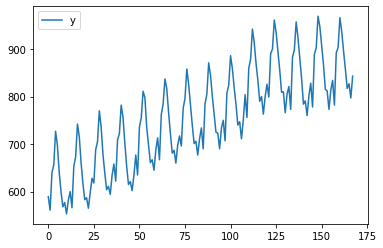

In [9]:
# lets plot to see the relationship between the two features

df.plot()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      168 non-null    object 
 1   y       168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [11]:
# We have to convert ds into datetime

df["ds"] = pd.to_datetime(df["ds"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      168 non-null    datetime64[ns]
 1   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [12]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


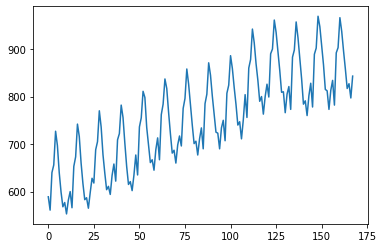

In [13]:
df["y"].plot()

In [14]:
# Shifting to Make y into stationary as it has seasonality-- not required in fbprophet

#df["y"] = df["y"] - df["y"].shift(1)

In [15]:
# Lets visualize

# df["y"].plot()

In [16]:
# Lets import Prophet

from fbprophet import Prophet

In [17]:
# lets see the inbuilt classes present inside prophet

dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

## Model Fitting

In [18]:
# Initialize the model and model fitting

model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [20]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

## Obtaining Forecasts

In [21]:
# Creating future dates of 365 days

future_dates = model.make_future_dataframe(periods = 365) # Here it will create next 365 days and append it to the original data

In [22]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [23]:
# Predictions

prediction = model.predict(future_dates)

In [24]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.941323,577.366901,596.710097,606.941323,606.941323,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,-20.151798,0.0,0.0,0.0,586.789525
1,1962-02-01,608.656256,535.358149,555.008158,608.656256,608.656256,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,-62.588619,0.0,0.0,0.0,546.067637
2,1962-03-01,610.205228,631.774779,650.511915,610.205228,610.205228,31.365739,31.365739,31.365739,31.365739,31.365739,31.365739,0.0,0.0,0.0,641.570967
3,1962-04-01,611.920161,648.884242,668.535675,611.920161,611.920161,46.703773,46.703773,46.703773,46.703773,46.703773,46.703773,0.0,0.0,0.0,658.623935
4,1962-05-01,613.579774,712.133429,731.599099,613.579774,613.579774,108.040207,108.040207,108.040207,108.040207,108.040207,108.040207,0.0,0.0,0.0,721.619981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.028496,804.412125,826.301962,870.116633,879.365413,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,-59.680857,0.0,0.0,0.0,815.347638
529,1976-11-27,875.046715,806.934857,830.256540,870.107772,879.399080,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,-56.567609,0.0,0.0,0.0,818.479106
530,1976-11-28,875.064935,810.277843,832.550272,870.098912,879.433093,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,-53.274871,0.0,0.0,0.0,821.790064
531,1976-11-29,875.083154,814.918401,836.330966,870.091056,879.467105,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,-49.863476,0.0,0.0,0.0,825.219679


In [25]:
# Checking the last five predictions

prediction[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail()

,ds,yhat_lower,yhat_upper,yhat
528,1976-11-26,804.412125,826.301962,815.347638
529,1976-11-27,806.934857,830.256540,818.479106
530,1976-11-28,810.277843,832.550272,821.790064
531,1976-11-29,814.918401,836.330966,825.219679
532,1976-11-30,817.194107,839.760890,828.699914


## Plotting the Forecasts
Prophet has an inbuilt feature that enables us to plot forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as argument. The dark blue line in the graph represents the predicted value while the black dots represents the data in our dataset. The light blue color represents trends.

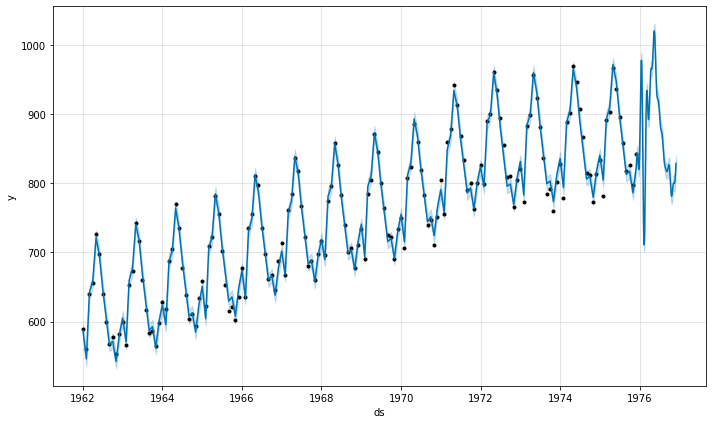

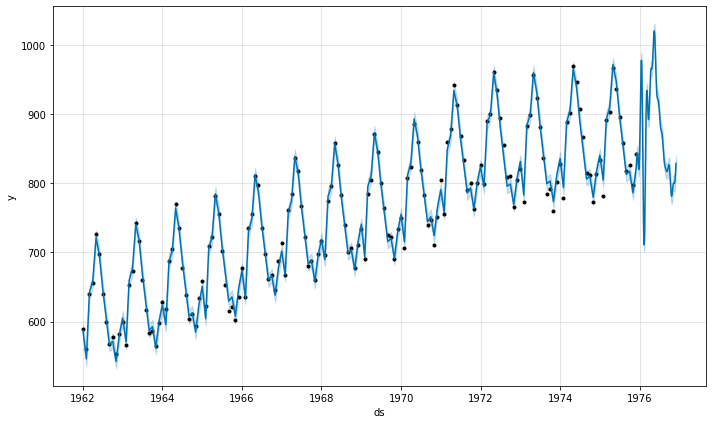

In [26]:
# Polotting the predicted projection

model.plot(prediction)

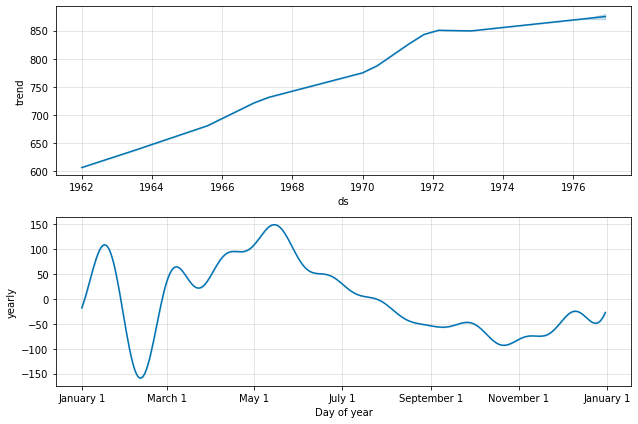

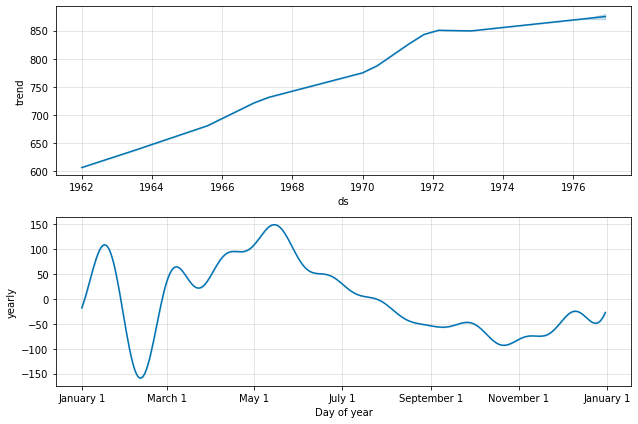

In [27]:
# Visualizing each component(trends, seasonality)

model.plot_components(prediction)

## Cross Validation
Next, lets measure the forecast error using historical data. We will do this by comparing the predicted values with the actual values. In order to perform this operation, we select cut off points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross validation method allows us to do this in Prophet. This method takes the following parameters as explained below:

1. Horizon the forecast horizon.
2. Initial the size of the initial training period.
3. Period the spacing between cutoff dates.

In [28]:
from fbprophet.diagnostics import cross_validation

In [29]:
df_cv = cross_validation(model, horizon = "365 days", period = "180 days", initial = "1095 days")

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [30]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,630.734519,628.518710,632.548035,622.0,1965-01-22
1,1965-03-01,715.209269,707.394071,721.031439,709.0,1965-01-22
2,1965-04-01,738.046179,723.123009,750.739163,722.0,1965-01-22
3,1965-05-01,809.508773,785.296749,829.284261,782.0,1965-01-22
4,1965-06-01,778.278652,743.572574,806.431528,756.0,1965-01-22


In [31]:
df_cv.shape

(252, 6)

In [32]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,849.442177,839.681895,859.636650,858.0,1974-12-01
248,1975-09-01,806.953913,796.394317,817.054776,817.0,1974-12-01
249,1975-10-01,810.381389,799.976788,821.785179,827.0,1974-12-01
250,1975-11-01,778.431546,767.213441,788.561780,797.0,1974-12-01
251,1975-12-01,812.870442,801.053674,823.898613,843.0,1974-12-01


## Computing performance metrics
We use the performance_metrics utility to compute Mean Squared Error(MSE), Root Mean Squared Error(RMSE), Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the yhat_lower and yhat_upper.

In [33]:
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,255.110328,15.972174,12.522709,0.016138,0.014043,0.36
1,41 days,253.085086,15.908648,12.440669,0.016069,0.014043,0.36
2,42 days,267.466632,16.354407,12.890051,0.016696,0.014071,0.36
3,43 days,267.960409,16.369496,13.005926,0.016878,0.014071,0.36
4,46 days,252.637615,15.894578,12.615442,0.016331,0.014071,0.36
...,...,...,...,...,...,...,...
180,357 days,884.015365,29.732396,22.644878,0.028549,0.023298,0.40
181,360 days,690.792073,26.282924,19.536284,0.024325,0.017204,0.44
182,361 days,678.229374,26.042837,19.143664,0.023926,0.013927,0.44
183,362 days,661.483112,25.719314,18.431256,0.023110,0.013880,0.48


## Visualize the performance metrics

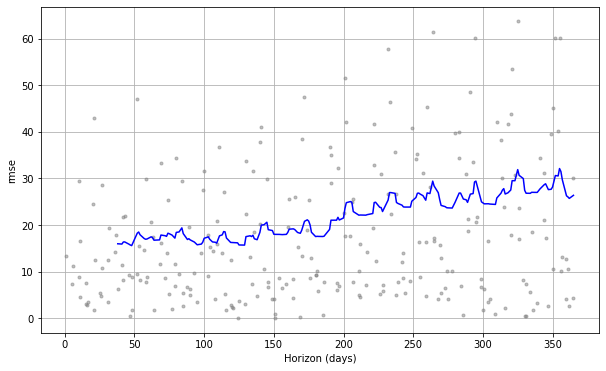

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric ="rmse")

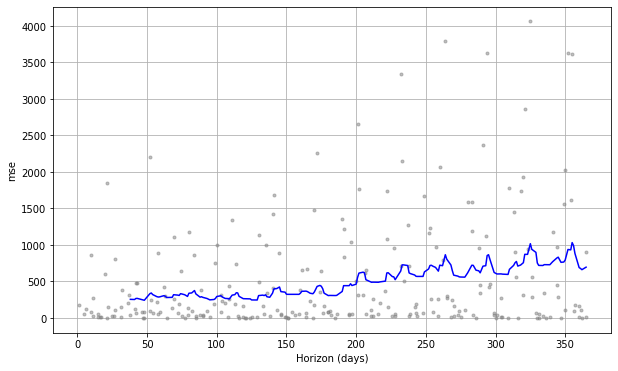

In [37]:
fig = plot_cross_validation_metric(df_cv, metric ="mse")

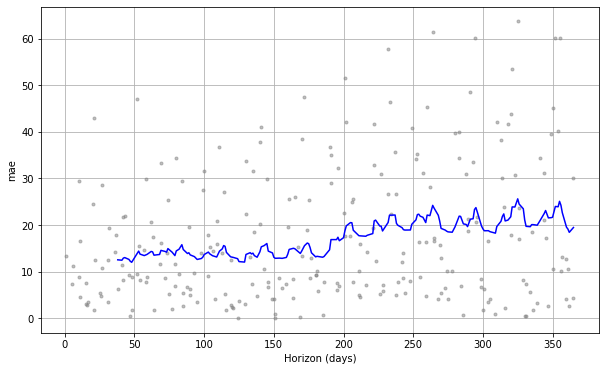

In [38]:
fig = plot_cross_validation_metric(df_cv, metric ="mae")

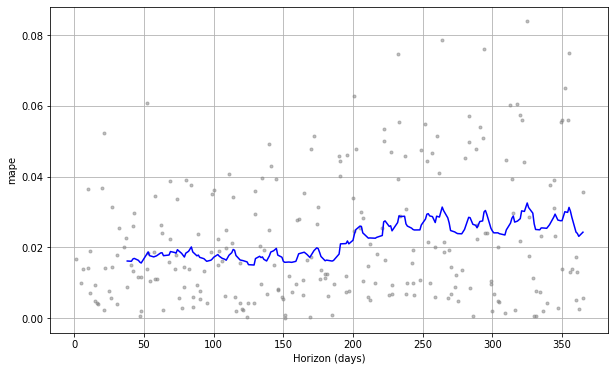

In [39]:
fig = plot_cross_validation_metric(df_cv, metric ="mape")

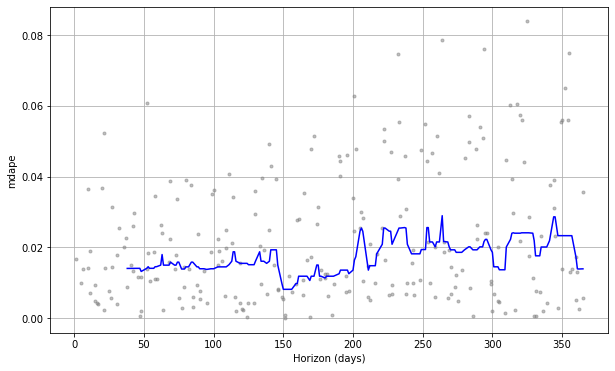

In [40]:
fig = plot_cross_validation_metric(df_cv, metric ="mdape")

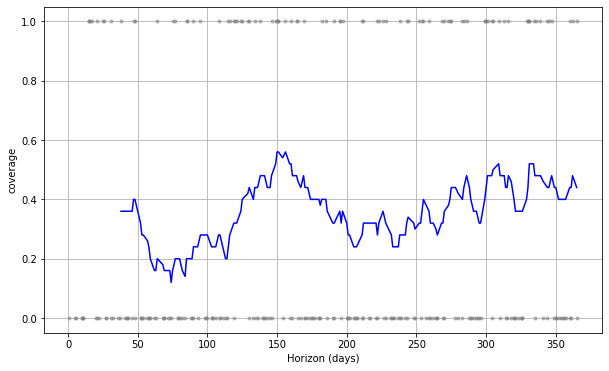

In [41]:
fig = plot_cross_validation_metric(df_cv, metric ="coverage")